## Multiple linear regression

The formula for MLR is the following:
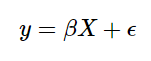

In which X is written in matrix form, being short for:
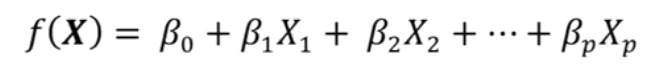

We use the matrix representation because it is easier in terms of writing the formulas and quicker to compute
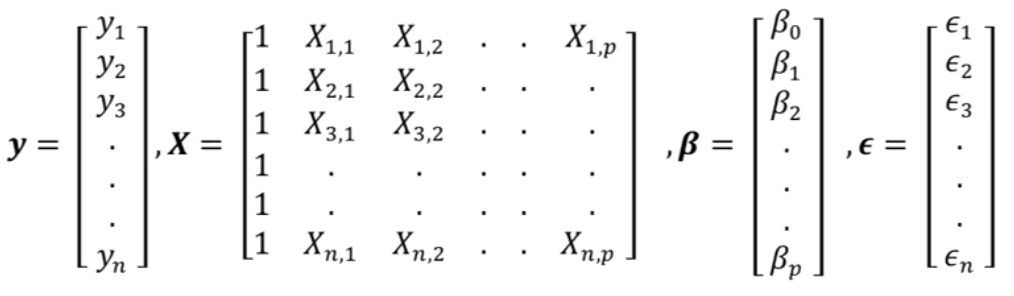

As with the simple linear regression, at local or global minima the slope of the residual plot will equal zero. To determine the values of x that maximize or minimize f(x), take the derivative, set it equal to zero and solve for x.

The sum of squared errors is:
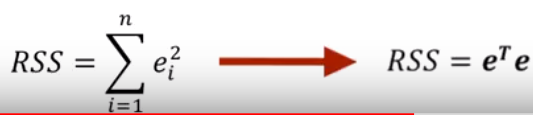

For which the errors can actually be replaced by the difference between the predictions and the actuals.
And then the predictions, are just the betas multiplied with the X matrix
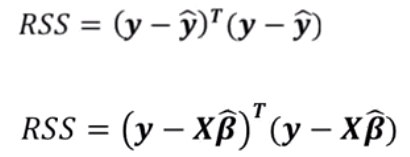

The function within brackets transposed is just each element inside of it transposed. <br>
After doing that, we can multiply out.
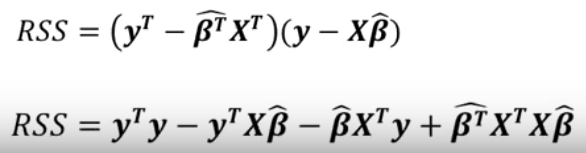

Now we need to find the point where the slope is zero for this function, therefore we take the derivative and set equal to 0. <br>
Basic differentiation rules for matrix calculus
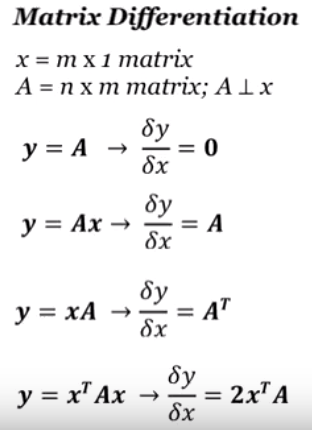

Since there are only plus and minus signs in the equation (and no divisions or multiplications) we can use the sum rule and perform the derivatives in parts.
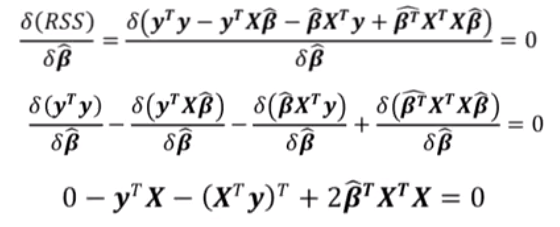

Now the transpose of the third part (the part in brackets) can be simplified by taking the transpose of the elements within. <br>
We then add the two negative parts, and devide by 2 since both sides have a 2 in them <br>
Taking the X.T* X inverse of both sides will leave just the B.T on the left side. <br>
So if we just transpose both sides one more time, we will have an equation with B on one side <br>
Note that X transposed multiplied with X is symmetric, so transposing it will result in the same
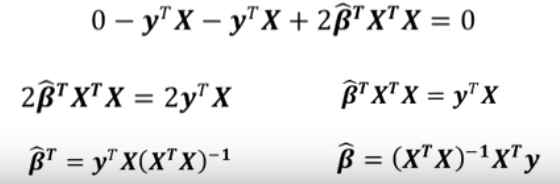

Note that this formula can only be performed, if the inverse of (X.T * X) exists. <br>
<br>
Multiplying with an inverse matrix is like division, it is the reciprocal function of multiplication. Thus, what would B.T be if it was not multiplied with (X.T * X). We take the inverse of (X.T * X) to find out. <br>
<br>
If an inverse of this function does not exist, it means there would be multiple solutions. <br>
This in turn means that the columns of X are linear dependent, i.e. one or more columns are a combination of other columns. <br>
<br>
Testing whether an inverse exists, we use Gaussian elimination to transform a matrix by solving for systems of linear equations. The matrix is singular and does not have one (and only one) inverse, if the test fails by leaving zeros that can’t be removed on the leading diagonal. See my IdentifyingSpecialMatrices notebook, for a code example which was an assignment in the Mathematics for Machine Learning Coursera course. <br>
<br>
If an inverse exists we can use the Gauss elimination again, but this time perform operation both on the matrix itself and on an identity matrix (leading diagonal 1's and all others zero) which we will transform to our inverse matrix. <br>
The technique remains straightforward, however, efficiently programming this function remains a challange when the matrix size increases. Find an example of this method below:
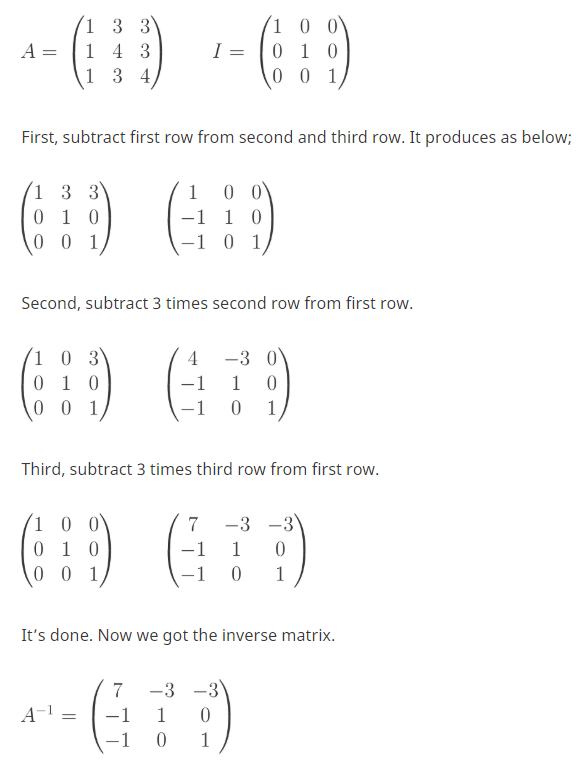

Note2: If two or multiple columns are not an exact combination of each other but (high levels of) multi-collinearity exists, the overall fit and predictive ability of the model can still work. However, the coefficients might be off as the model cannot calculate how the variance in the dependent variable is correlated with one single independent variable as the single predictor is correlated with another predictor and thus most often moves along. 

## Proof that this is actually true

In [1]:
# %load notebook_preps.py
# Libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.metrics import mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
import warnings

# Notebook options
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (9, 6)

# UDF's
def Variance(x):
    return np.sum((x - np.mean(x))**2) / len(x)

def Covariance(x, y):
    return np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) -1)

def transpose_df(df):
    R, C = df.shape
    df_tr = pd.DataFrame(np.zeros((C, R)))    
    for row in range(C):
        for col in range(R):
            df_tr.iloc[row, col] = df.iloc[col, row]    
    return df_tr

def matrix_dotpr(X, Y):
    R, C = X.shape[0], Y.shape[1]
    df_tr = pd.DataFrame(np.zeros((R, C)))
    for row in range(R):
        for col in range(C):
            df_tr.iloc[row, col] = round(np.sum(X.iloc[row,:] * Y.iloc[:,col]), 6)
    return df_tr

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.linalg import inv
from sklearn.datasets import load_boston
from statsmodels.regression.linear_model import OLS

In [3]:
# load the boston data set
boston = load_boston()
X = pd.DataFrame(boston.data)
y = boston.target
feature_names = boston.feature_names

In [4]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Link to the tutorial: https://datascienceplus.com/linear-regression-from-scratch-in-python/ 
# print(boston.DESCR)

In [6]:
# Test UDF's
np.allclose(X.T, transpose_df(X))
np.allclose(matrix_dotpr(X, X.T), X.dot(X.T))

True

True

In [7]:
# We will need to add a vector of ones (arbitrary, as any constant would suffice) to our feature matrix for the intercept term
# A model most often has a bias and does not originate at 0. Therefore, having one constant feature account for the average bias
# will create a coefficient for the intercept.
int_ = np.ones(shape=y.shape)
X = np.column_stack((int_, X))

In [8]:
# calculate coefficients using closed-form solution
coeffs = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
coeffs

array([ 3.64911033e+01, -1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
        2.68856140e+00, -1.77957587e+01,  3.80475246e+00,  7.51061703e-04,
       -1.47575880e+00,  3.05655038e-01, -1.23293463e-02, -9.53463555e-01,
        9.39251272e-03, -5.25466633e-01])

In [9]:
# Check with a known model
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)
lm.coef_

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

array([ 3.64911033e+01, -1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
        2.68856140e+00, -1.77957587e+01,  3.80475246e+00,  7.51061703e-04,
       -1.47575880e+00,  3.05655038e-01, -1.23293463e-02, -9.53463555e-01,
        9.39251272e-03, -5.25466633e-01])